In [1]:
using Plots
using BioTools
using TreeTools
using Dates
using StatsBase, Measures

In [2]:
pyplot()
plot(rand(10), size=(1,1))

In [3]:
lfs = 26 # Legend font size
alfs = 26 # axis label font size
tfs = 26 # title font size
atfs = 26 # axis ticks font size
ga = 0.3 # grid alpha
sizes = (1200,960) # standard size for single plots
rl = 0.065 # position of the "A" or "B" label in % 
ms = 6 # marker size
ls = 6 # line size
plotfolder = "General_NEW"
final_plotfolder = "$(homedir())/Documents/BaleLabo/Notes/FluPredictibility/Article/Figures";

# Number of sequences 

In [4]:
# binwidth = Day(15);
# binspacing = Month(1);
fp = Flu.FluPop("../../data/aligned_h3n2_ha_aa.fasta", :aa, Flu.flu_usual_header_fields, 
    flulineage="h3n2", segment="ha");

Reading ../../data/aligned_h3n2_ha_aa.fasta...
Read 44976 strains out of 61848. Filtered 16872. Could not read 0


In [5]:
binwidth = Year(1);
binspacing = Year(1);
Flu.bin_by_date!(fp, binwidth=binwidth, binspacing = binspacing);

In [6]:
# r = Flu.nextstrain_regions[1]
# tmp = deepcopy(fp);
# Flu.filter_by_region!(tmp, r);

In [7]:
fpr = Dict()
for r in Flu.nextstrain_regions
    fpr[r] = Flu.filter_by_region(fp, r)
end

In [8]:
#
styles = filter((s->begin
                s in Plots.supported_styles()
            end), [:solid, :dash, :dot, :dashdot, :dashdotdot])
styles = reshape(styles, 1, length(styles))

1×4 Array{Symbol,2}:
 :solid  :dash  :dot  :dashdot

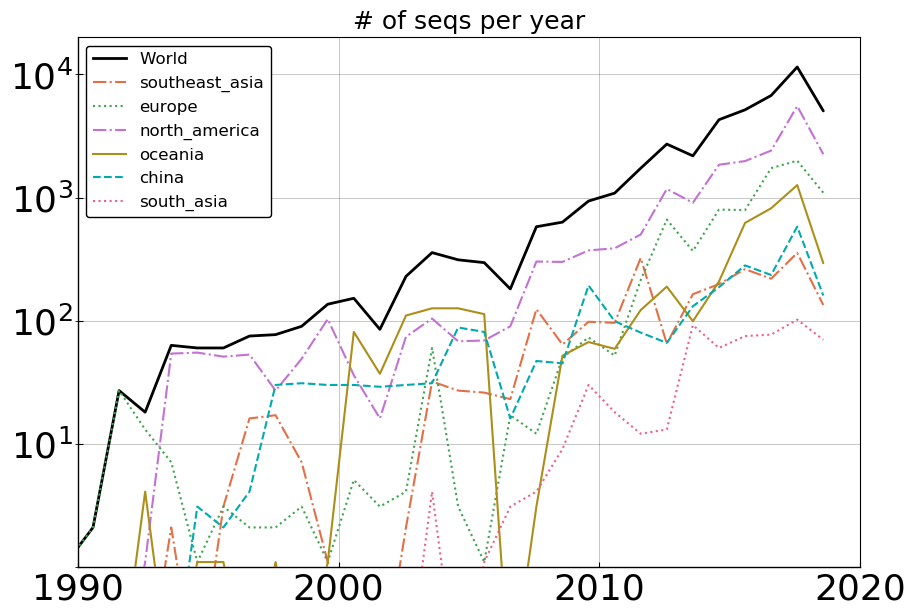

In [9]:
# Dates
X = Flu.datebin_to_date.(keys(fp.datebin))
X = [year(x) + month(x)/12. for x in X]
tmp = sortperm(X)
# Numbers
Y = length.(values(fp.datebin))
# 
X = X[tmp]; Y = Y[tmp]
p = plot(X,Y .+1e-1, line=(:black, 2), label="World")

# By regions
region_list = ("north_america","china","south_asia","japan","europe","southeast_asia","oceania")
for (i,(r,fpt)) in enumerate(fpr)
    # Dates
    X = Flu.datebin_to_date.(keys(sort(fpt.datebin)))
    X = [year(x) + month(x)/12. for x in X]
    # Numbers
    Y = length.(values(sort(fpt.datebin)))
    #
    if in(r,region_list)
        plot!(p, X, Y .+1e-1, label="$r", line=(1.5, styles[mod(i,4)+1]))
    end
end
plot!(p, xlim = (1990,2020), ylim=(1,20000), title="# of seqs per year", size=(900,600), yscale=:log10)
plot!(p, yticks=[10,100,1000,10000])
plot!(p, framestyle=:box, legendfontsize=12, tickfontsize=atfs, guidefontsize=alfs, gridalpha=ga, titlefontsize=18)
savefig("$(plotfolder)/Nseq_per_year.png")
p_seqs_per_year = p;

### And by month

In [10]:
binwidth = Month(1);
binspacing = Month(1);
Flu.bin_by_date!(fp, start = Date(2000), binwidth=binwidth, binspacing = binspacing);
#
fpr = Dict()
for r in Flu.nextstrain_regions
    fpr[r] = Flu.filter_by_region(fp, r)
end
# 
fp_na = Flu.FluPop("../../data/aligned_h3n2_na_aa.fasta", :aa, Flu.flu_usual_header_fields, 
    flulineage="h3n2", segment="na");
Flu.bin_by_date!(fp_na, start = Date(2000), binwidth=binwidth, binspacing = binspacing);

Reading ../../data/aligned_h3n2_na_aa.fasta...
Read 36300 strains out of 39312. Filtered 3012. Could not read 0


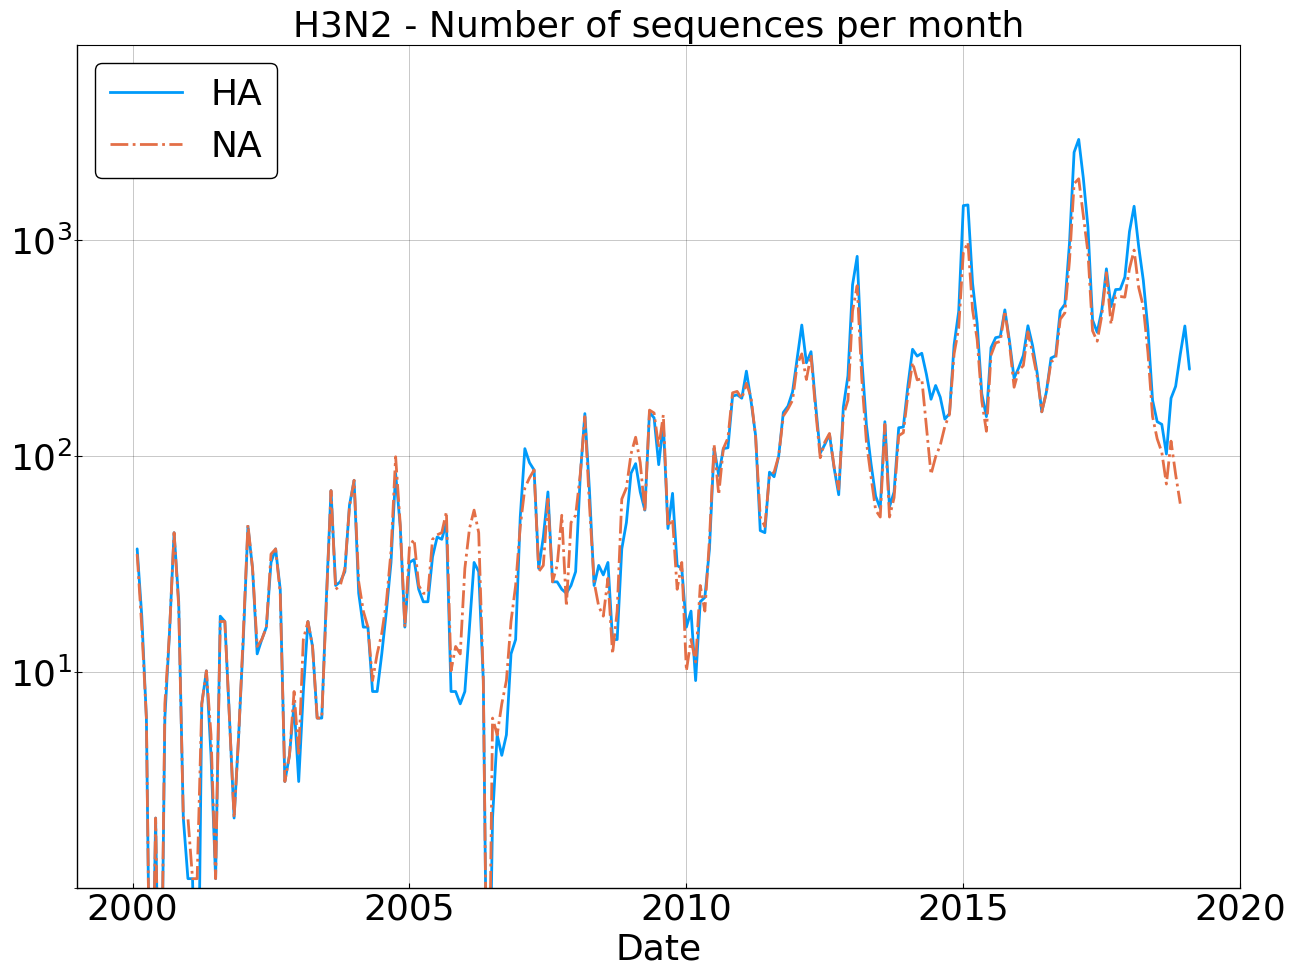

In [11]:
# Dates
X = Flu.datebin_to_date.(keys(fp.datebin))
X = [year(x) + month(x)/12. for x in X]
X_na = Flu.datebin_to_date.(keys(fp_na.datebin))
X_na = sort([year(x) + month(x)/12. for x in X_na])
tmp = sortperm(X)
# Numbers
Y = length.(values(fp.datebin))
Y_na = length.(values(sort(fp_na.datebin)))
# 
X = X[tmp]; Y = Y[tmp];
p = plot(X,Y .+1e-1, line=(2), label="HA")
p = plot!(X_na,Y_na .+1e-1, line=(2, :dashdot), label="NA")

# By regions
# region_list = ("north_america","china","south_asia","japan","europe","southeast_asia","oceania")
# for (i,(r,fpt)) in enumerate(fpr)
#     # Dates
#     X = Flu.datebin_to_date.(keys(sort(fpt.datebin)))
#     X = [year(x) + month(x)/12. for x in X]
#     # Numbers
#     Y = length.(values(sort(fpt.datebin)))
#     #
#     if in(r,region_list)
#         plot!(p, X, Y .+1e-1, label="$r", line=(1.5, styles[mod(i,4)+1]))
#     end
# end
plot!(p, xlim = (1999,2020), ylim=(1,8000), title="", size=(1280,960), yscale=:log10)
plot!(p, yticks=[10,100,1000,10000])
plot!(xlabel="Date", title="H3N2 - Number of sequences per month")
plot!(p, framestyle=:box, legendfontsize=lfs, tickfontsize=tfs, guidefontsize=alfs, gridalpha=ga, titlefontsize=atfs)
savefig("$(plotfolder)/Nseq_per_month.png")
savefig("$(final_plotfolder)/Nseq_per_month.png")

# Typical trajectories

In [12]:
include("../functions/plot_functions.jl")

pfix_v_freq_positivederivative (generic function with 1 method)

In [13]:
fp = Flu.FluPop("../../data/aligned_h3n2_ha_aa.fasta", :aa, Flu.flu_usual_header_fields, 
    flulineage="h3n2", segment="ha")
binwidth = Day(120);
binspacing = Day(120);
Flu.bin_by_date!(fp, start = Date(2000), binwidth=binwidth, binspacing = binspacing);

Reading ../../data/aligned_h3n2_ha_aa.fasta...
Read 44976 strains out of 61848. Filtered 16872. Could not read 0


In [14]:
ph_all = Flu.PosEvo(fp);

In [15]:
entropies = Float64[]
for p in ph_all
    push!(entropies, mean(Flu.entropy(p)[1]))
end
ph_var = ph_all[sortperm(entropies, rev=true)][1:9];

In [25]:
plist = []
for (i,p) in enumerate(ph_var)
    tmp = plot_all_trajectories([p], yearticks=true)
    plot!(tmp, title="$(p.i)", frame=:box, size = (600,400))
    plot!(tmp, framestyle=:box, legendfontsize=lfs, tickfontsize=32, guidefontsize=32, gridalpha=ga, legend=:topright, titlefontsize=32)
    plot!(tmp, xlim=(1999,2023),  xticks=[1990,1995,2000,2005,2010,2015,2020])
    if mod(i,3)!=1
        plot!(tmp, ytickfontsize=0)
    end
    if i <= 6
        plot!(tmp, xtickfontsize=0)
#         print("xticks  ")
    end
#     println(i, " ", p.i)
    push!(plist, tmp)
end

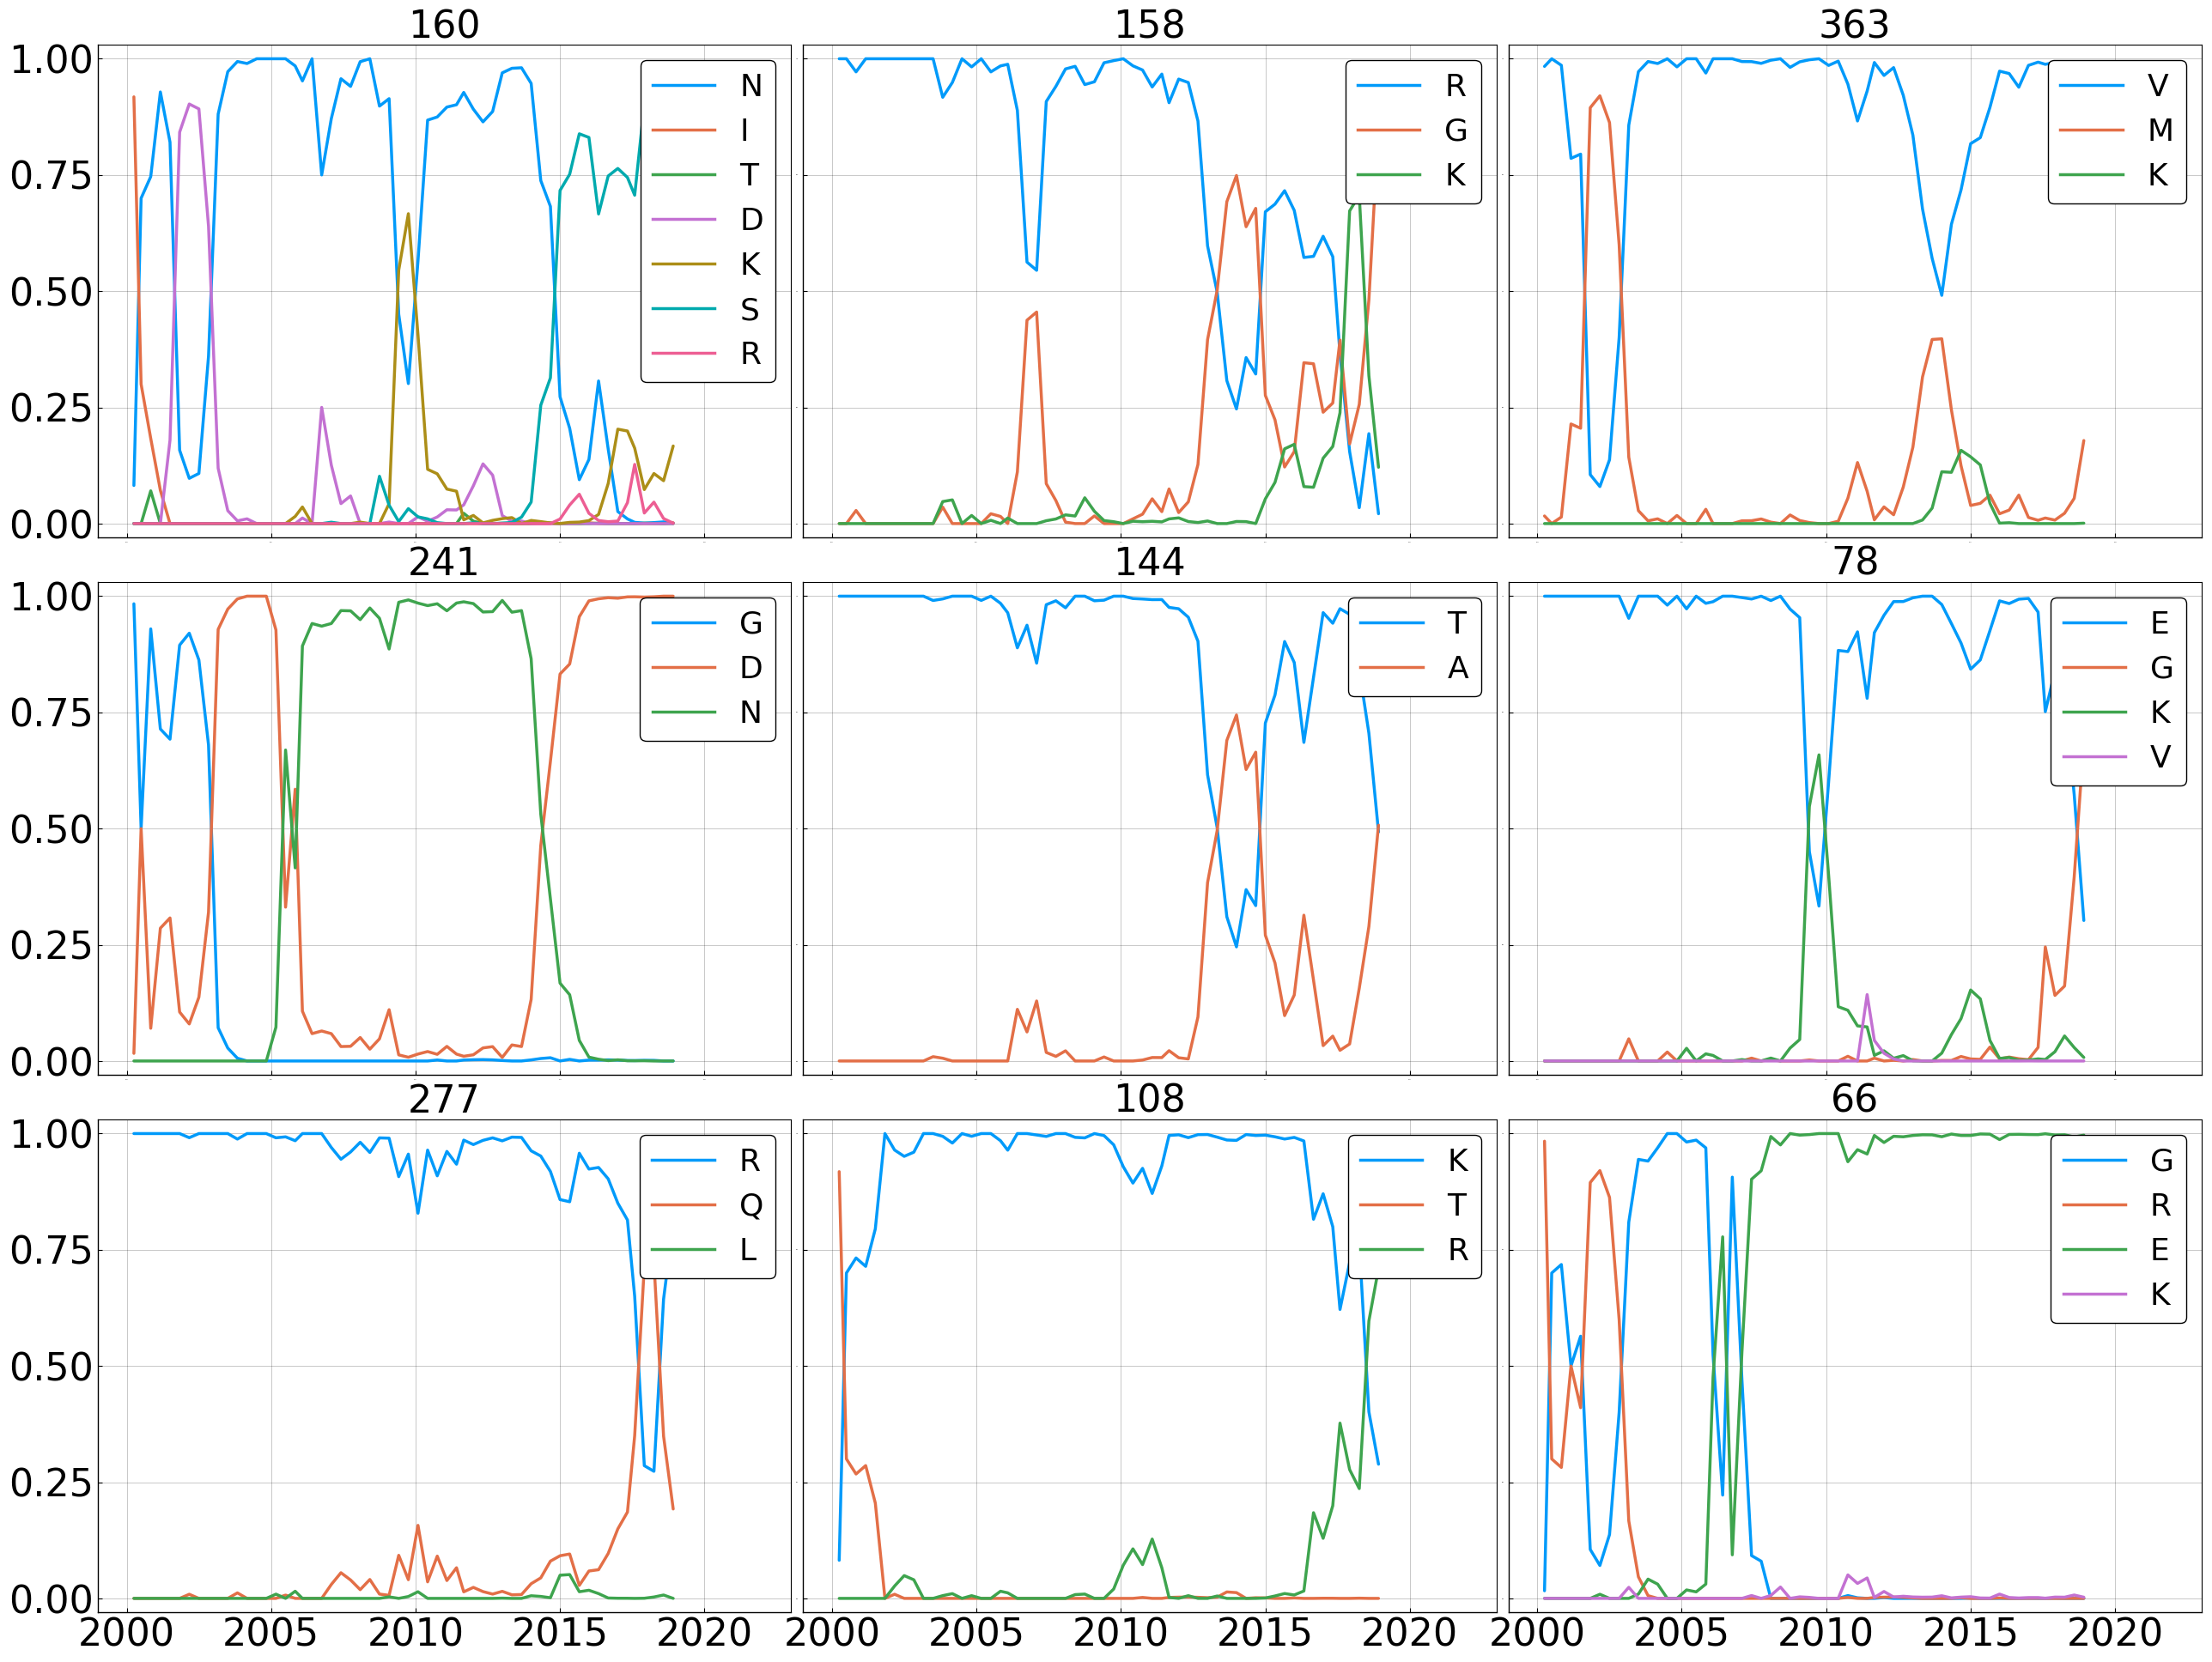

In [26]:
plot(plist..., layout = (3,3), size=(2560,1920))
savefig("$(plotfolder)/Trajectories_layout.png")
savefig("$(final_plotfolder)/sample_trajectories.png")

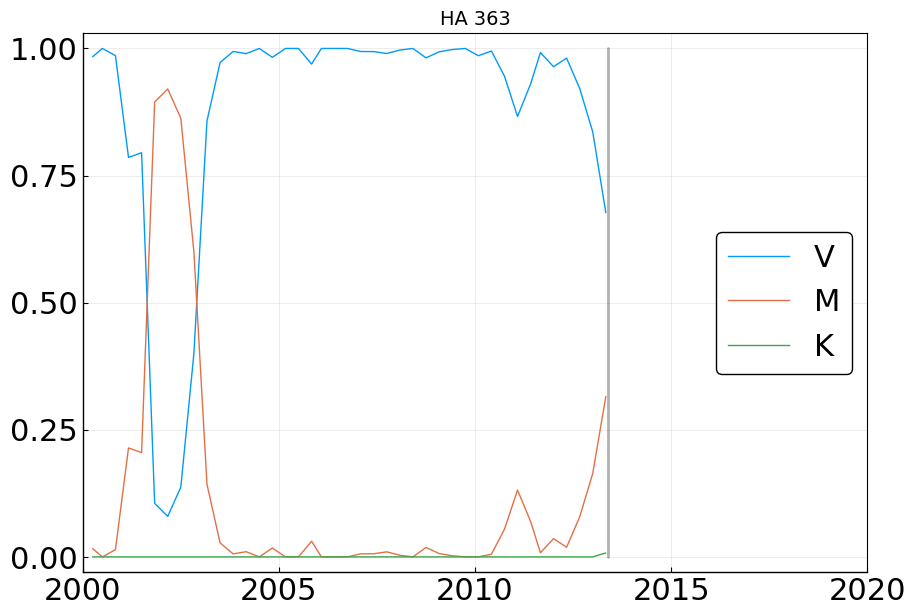

In [205]:
i = 3
z = ph_var[i]
X,Y,tmp,α = Flu.frequency_series(z)
X = [year(x) + month(x) /12. for x in X]
idx = findall(x->x<=2013.6, X)
p = plot(size=(900,600))
for a in 1:size(Y,2)
	plot!(p, X[idx], Y[idx,a], label="$(α[a])", color=a)
end
plot!(p,[X[idx[end]]+0.05,X[idx[end]]+0.05], [0,1], line=(2, :black),label="", alpha=0.3)
plot!(p,xlim = (2000,2020),frame=:box, title="HA $(z.i)", tickfontsize=tfs, legendfontsize=lfs,legend=:right)
savefig("$(plotfolder)/traj_i$(z.i)_nofuture.png")
p_pos363_nof = p;

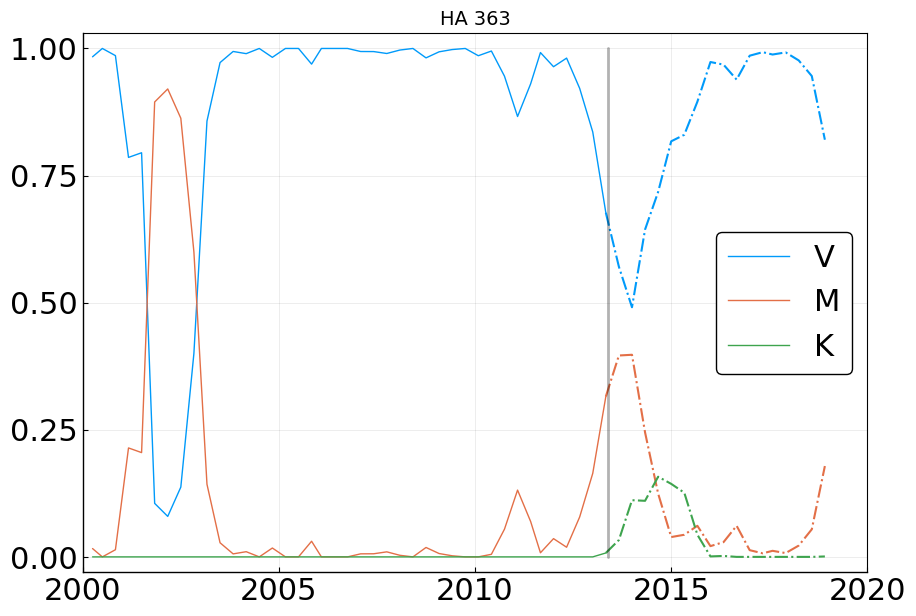

In [206]:
i = 3
z = ph_var[i]
X,Y,tmp,α = Flu.frequency_series(z)
X = [year(x) + month(x) /12. for x in X]
idx = findall(x->x<=2013.6, X)
p = plot(size=(900,600))
for a in 1:size(Y,2)
	plot!(p, X[idx], Y[idx,a], label="$(α[a])", color=a)
    plot!(p, X[max(idx...):end], Y[max(idx...):end,a], label="", line=[:dashdot], linewidth=1.5, color=a)
end
plot!(p,[X[idx[end]]+0.05,X[idx[end]]+0.05], [0,1], line=(2, :black),label="", alpha=0.3)
plot!(p,xlim = (2000,2020),frame=:box, title="HA $(z.i)", tickfontsize=tfs, legendfontsize=lfs)
savefig("$(plotfolder)/traj_i$(z.i)_withfuture.png")

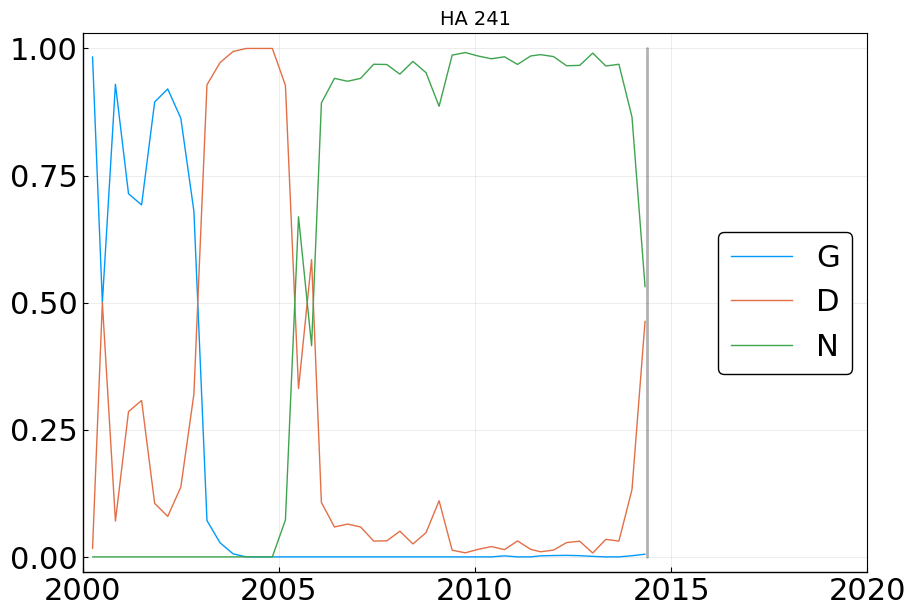

In [207]:
i = 4
z = ph_var[i]
X,Y,tmp,α = Flu.frequency_series(z)
X = [year(x) + month(x) /12. for x in X]
idx = findall(x->x<=2014.5, X)
p = plot(size=(900,600))
for a in 1:size(Y,2)
	plot!(p, X[idx], Y[idx,a], label="$(α[a])", color=a)
#     plot!(p, X[max(idx...):end], Y[max(idx...):end,a], label="$(z.alphabet[a])", line=[:dashdot], linewidth=1.5, color=a)
end
plot!(p,[X[idx[end]]+0.05,X[idx[end]]+0.05], [0,1], line=(2, :black),label="", alpha=0.3)
plot!(p,xlim = (2000,2020),frame=:box, title="HA $(z.i)", tickfontsize=tfs, legendfontsize=lfs, legend=:right)
savefig("$(plotfolder)/traj_i$(z.i)_nofuture.png")
p_pos241_nof = p;

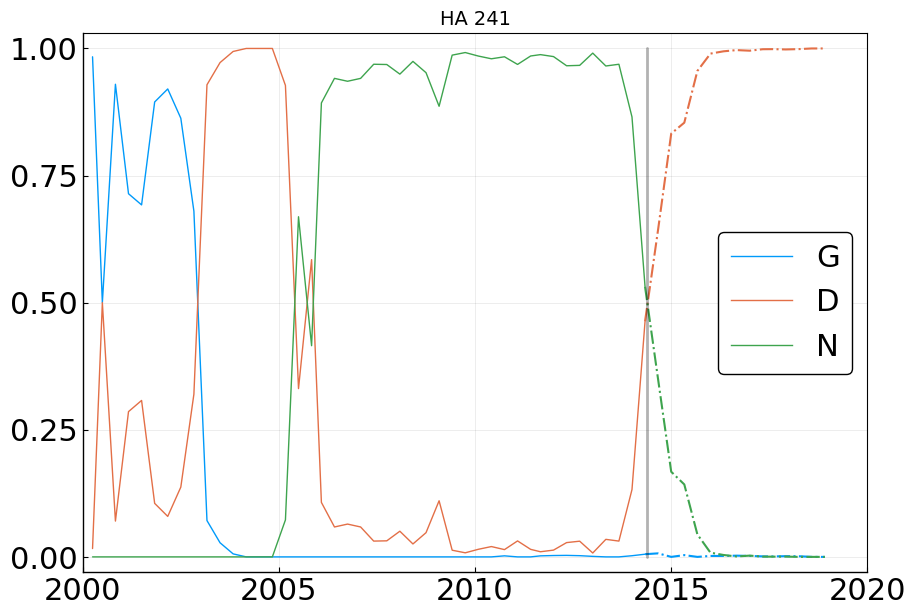

In [208]:
i = 4
z = ph_var[i]
X,Y,tmp,α = Flu.frequency_series(z)
X = [year(x) + month(x) /12. for x in X]
idx = findall(x->x<=2014.5, X)
p = plot(size=(900,600))
for a in 1:size(Y,2)
	plot!(p, X[idx], Y[idx,a], label="$(α[a])", color=a)
    plot!(p, X[max(idx...):end], Y[max(idx...):end,a], label="", line=[:dashdot], linewidth=1.5, color=a)
end
plot!(p,[X[idx[end]]+0.05,X[idx[end]]+0.05], [0,1], line=(2, :black),label="", alpha=0.3)
plot!(p,xlim = (2000,2020),frame=:box, title="HA $(z.i)", tickfontsize=tfs, legendfontsize=lfs)
savefig("$(plotfolder)/traj_i$(z.i)_withfuture.png")

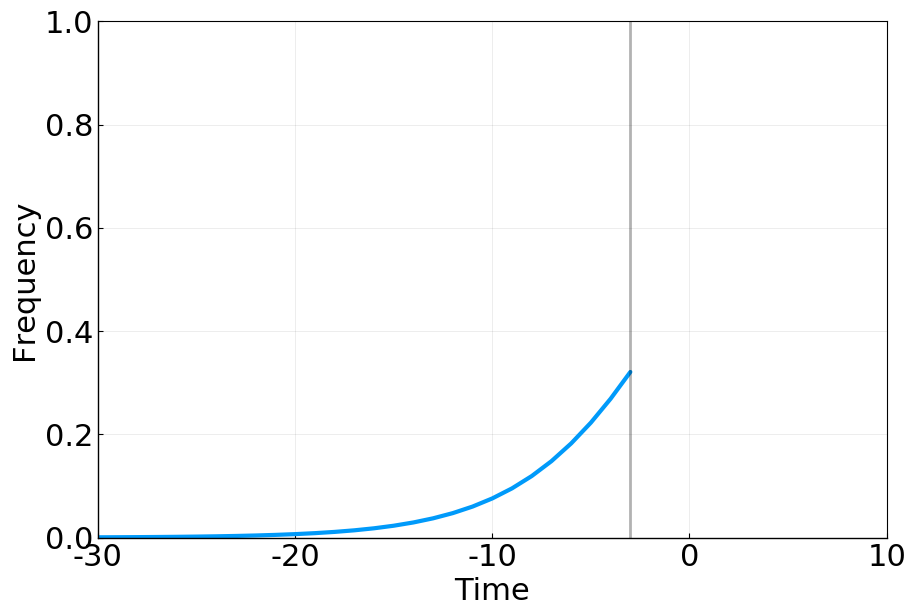

In [209]:
f(x,xe) = exp(x/xe) / (1+exp(x/xe)) 
X = -30:-3
Y = f.(X,4)
x2 = -3:0
#
p = plot(X,Y,ylim=(0,1),xlim=(-30,10), size=(900,600), label="", linewidth=3)
plot!(p,[-3,-3], [0,1], line=(2, :black),label="", alpha=0.3)
plot!()
plot!(p, xtickfontsize=0, xlabel="Time",ylabel="Frequency", frame=:box)
plot!(guidefontsize=alfs, tickfontsize=tfs)
savefig("$plotfolder/ideal_trajectory.png")

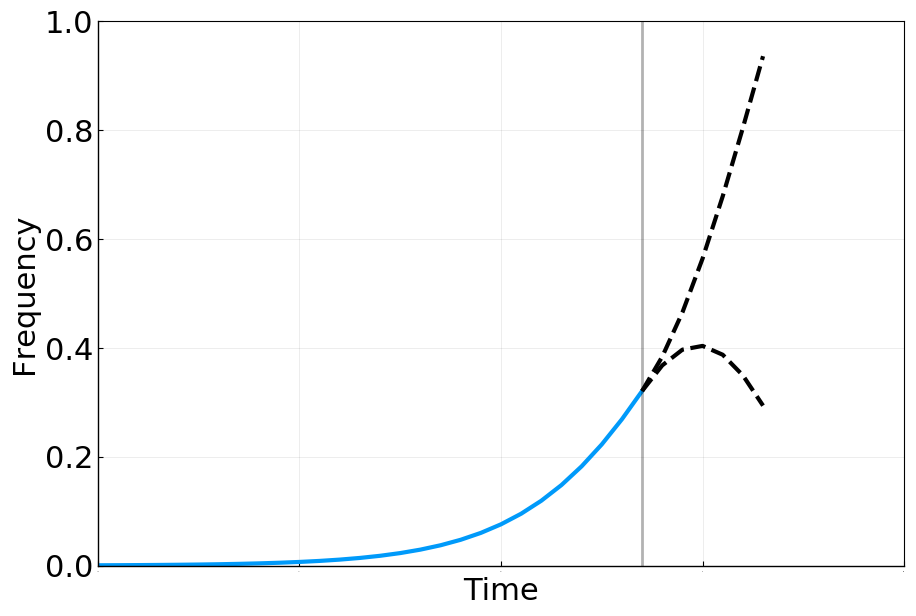

In [210]:
f(x,xe) = exp(x/xe) / (1+exp(x/xe)) 
g(x) = x^2/2
X = -30:-3
Y = f.(X,4)
x2 = -3:3
#
p = plot(X,Y,ylim=(0,1),xlim=(-30,10), size=(900,600), label="", linewidth=3)
plot!(p,[-3,-3], [0,1], line=(2, :black),label="", alpha=0.3)
plot!(p, x2, -3*(f.(x2,4) .- Y[end]).^2 + f.(x2,4), line=(3,:dash, :black), label="")
plot!(p, x2, 2*(f.(x2,4) .- Y[end]).^2 + f.(x2,4), line=(3,:dash, :black), label="")
plot!(guidefontsize=alfs, tickfontsize=tfs)
plot!(p, xtickfontsize=0, xlabel="Time",ylabel="Frequency", frame=:box)
savefig("$plotfolder/ideal_trajectory.png")

# Panels

In [257]:
plot!(p_pos241_nof, xlim=(2000, 2021), size=(640, 480), ann=(2019, 0.07, text("B",60)), legend=:topright)
plot!(p_pos363_nof, xlim=(2000, 2020), size=(640, 480), ann=(2018, 0.07, text("C",60)), legend=:topright)
plot!(p_pos241_nof, ylabel="Frequency", guidefontsize=26, tickfontsize=26)
plot!(p_pos363_nof, ytickfontsize=0)
pb = plot(p_pos241_nof, p_pos363_nof, size=(1280, 480), title="", linewidth=2, layout=grid(1,2))
# plot!(pb, plot_title="A")
pt = plot(p_seqs_per_year, ylim=(1, 50_000), size=(1280, 960), legendfontsize=22, linewidth=3)
plot!(pt, ann=(2018, 1.5, text("A",60)))
plot!(pt, ylabel="Number of seqs.", xlabel="Year", guidefontsize=26)
plot!(pt, title="")
pb;

In [269]:
420 / 1120

0.375

In [273]:
480/1280

0.375

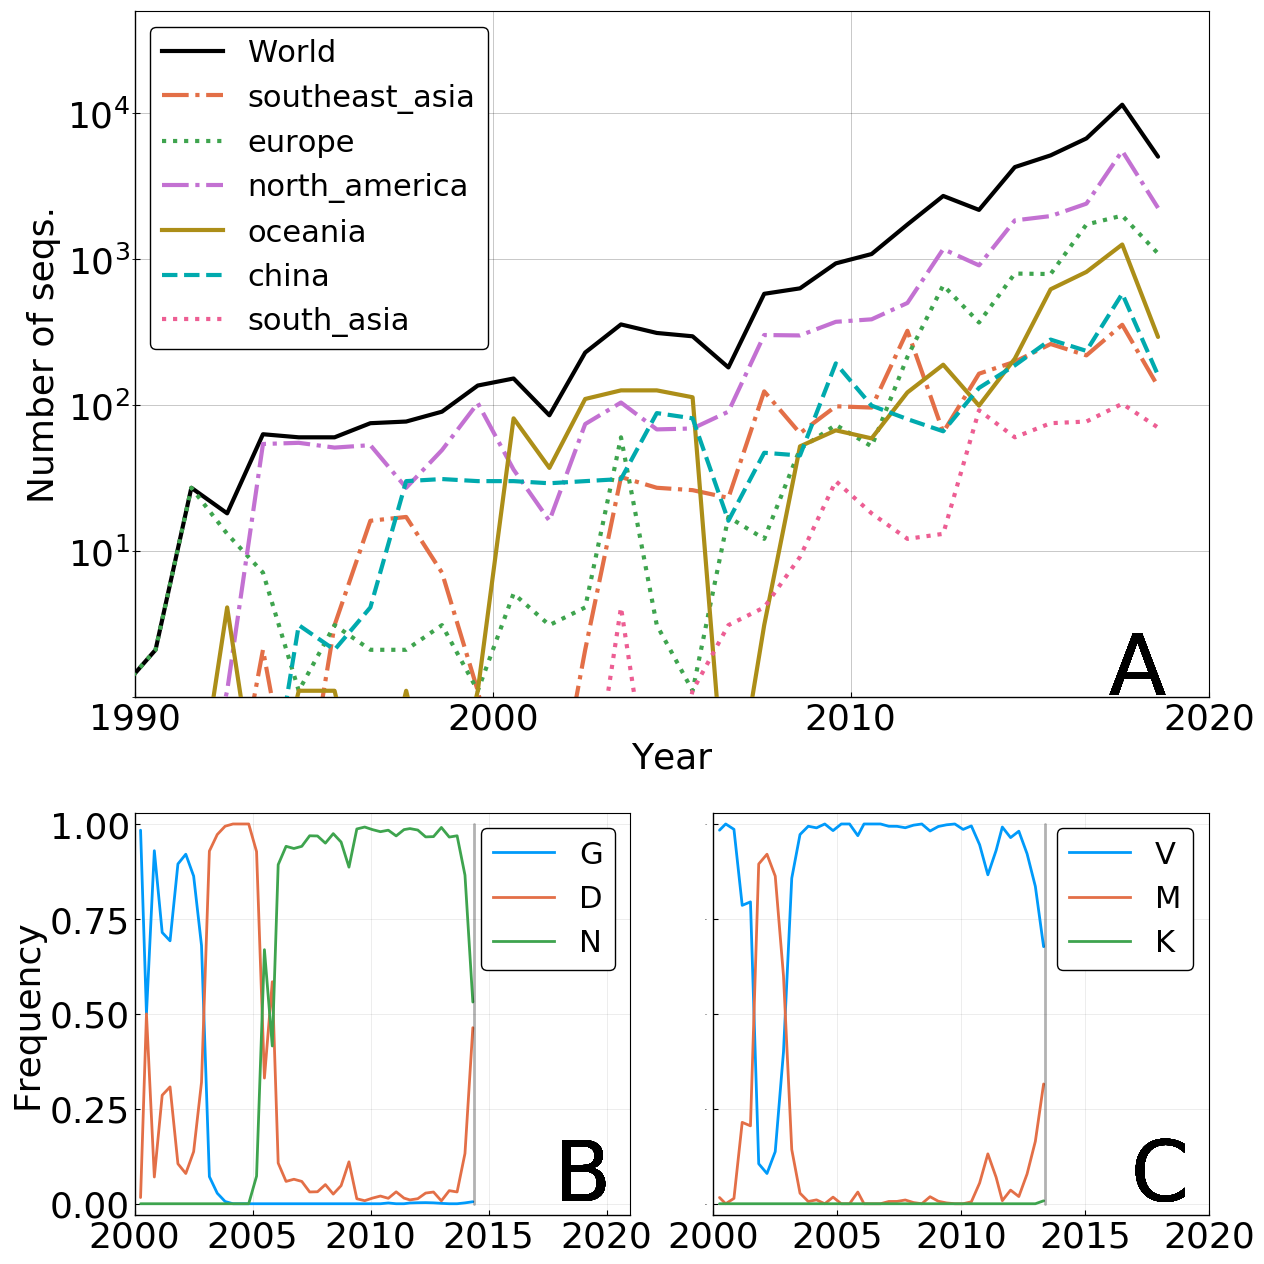

In [274]:
# Panel for the main __Results__ section, showing data used and general question
# plot!(p_seqs_per_year, title="", legendfontsize=lfs)

p = plot(p_seqs_per_year, pb, layout=grid(2, 1, heights=[0.63, 0.37]))
plot!(p, size=(1280, 1280), margin=5mm)
savefig(p, "$final_plotfolder/Panel1.png");


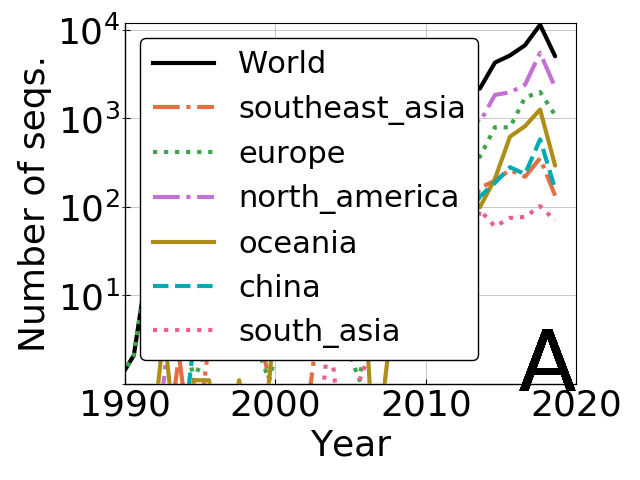

In [250]:
p1 = plot(p_seqs_per_year, ylim=(1, 12_000), size=(640,480), legendfontsize=22, linewidth=3)
plot!(p1, ann=(2018, 1.5, text("A",60)))
